<a href="https://colab.research.google.com/github/humamfa/ImageClassification_Animals/blob/main/Image_Classification_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
!pip install opendatasets
import opendatasets as od
import nltk
nltk.download('wordnet')
import pickle
!pip install split-folders
import splitfolders
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Reshape, SpatialDropout1D
from keras.datasets import imdb

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
od.download('https://www.kaggle.com/datasets/ahmedxc4/parasite-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: humamfa
Your Kaggle Key: ··········


100%|██████████| 160M/160M [00:04<00:00, 36.0MB/s]


In [ ]:
base_dir = '/content/parasite-dataset/parasite-dataset'
train_dir = '/content/output/train'
validation_dir = '/content/output/val'

In [ ]:
%pip install split-folders
import splitfolders

splitfolders.ratio(base_dir, output="output", seed=6666, ratio=(.8, .2), group_prefix=None)

Copying files: 34298 files [00:07, 4589.34 files/s]


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.2,
                    fill_mode = 'wrap',
                    )

validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100, 150),
        batch_size=64,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 150),
        batch_size=64,
        class_mode='categorical')

Found 27435 images belonging to 9 classes.
Found 6863 images belonging to 9 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 148, 32)       896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 10, 17, 128)      

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAkurasi telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
      train_generator,
      steps_per_epoch=35,
      epochs=1000,
      validation_data=validation_generator,
      validation_steps=15,
      verbose=2,
      callbacks=[callbacks])

Epoch 1/1000
35/35 - 23s - loss: 1.7884 - accuracy: 0.3054 - val_loss: 1.6443 - val_accuracy: 0.3396 - 23s/epoch - 670ms/step
Epoch 2/1000
35/35 - 19s - loss: 1.5452 - accuracy: 0.4451 - val_loss: 1.4934 - val_accuracy: 0.4313 - 19s/epoch - 554ms/step
Epoch 3/1000
35/35 - 21s - loss: 1.3024 - accuracy: 0.5683 - val_loss: 1.1985 - val_accuracy: 0.6521 - 21s/epoch - 593ms/step
Epoch 4/1000
35/35 - 15s - loss: 1.1298 - accuracy: 0.6348 - val_loss: 0.9718 - val_accuracy: 0.6500 - 15s/epoch - 442ms/step
Epoch 5/1000
35/35 - 15s - loss: 0.9606 - accuracy: 0.6866 - val_loss: 0.8416 - val_accuracy: 0.7333 - 15s/epoch - 437ms/step
Epoch 6/1000
35/35 - 15s - loss: 0.8729 - accuracy: 0.7179 - val_loss: 0.8886 - val_accuracy: 0.6760 - 15s/epoch - 421ms/step
Epoch 7/1000
35/35 - 15s - loss: 0.8031 - accuracy: 0.7402 - val_loss: 0.7360 - val_accuracy: 0.7583 - 15s/epoch - 441ms/step
Epoch 8/1000
35/35 - 16s - loss: 0.7562 - accuracy: 0.7472 - val_loss: 0.6626 - val_accuracy: 0.7750 - 16s/epoch - 453

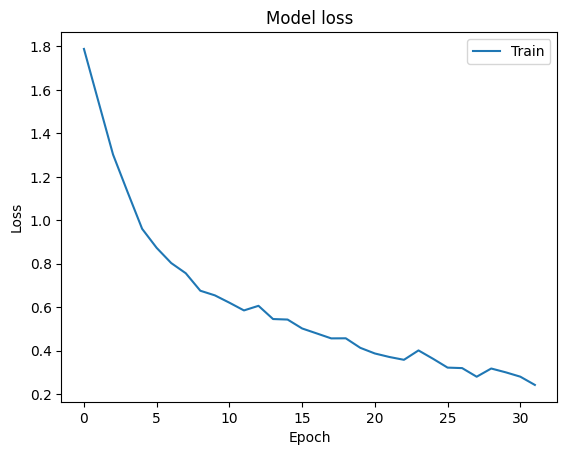

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

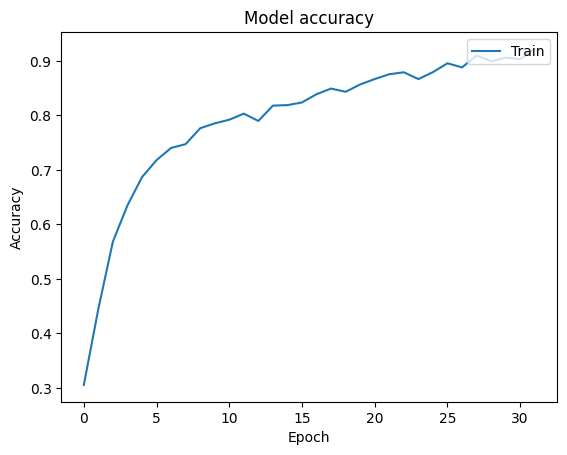

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [ ]:
import pathlib

export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('parasite.tflite')
tflite_model_file.write_bytes(tflite_model)

8908848